In [1]:
import os
import sys
import google.generativeai as genai

from dotenv import load_dotenv

sys.path.append(os.path.abspath(os.pardir))
load_dotenv('../.env')

True

In [33]:
# image_path = 'soy_source.jpeg'
image_path = 'soy_source2.jpeg'

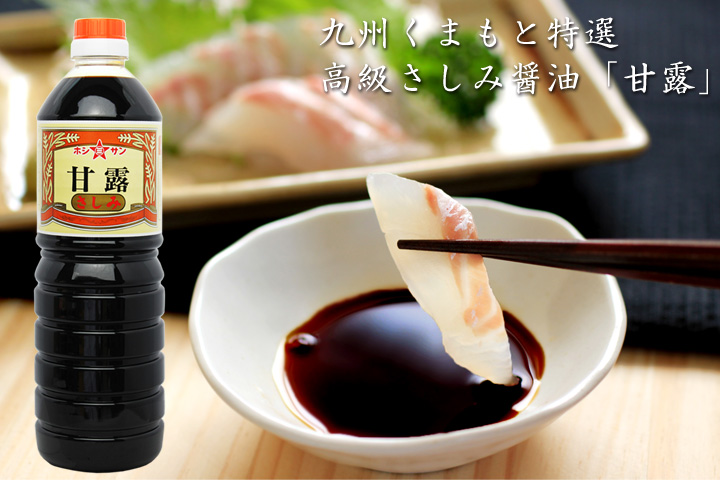

In [34]:
# code of PIL.Image in the docs does not work!
from IPython.display import Image

img = Image(image_path)
img

In [38]:
genai.configure(api_key=os.getenv('GOOGLE_GENERATIVE_LANGUAGE_API_KEY'))

model = genai.GenerativeModel('gemini-pro-vision')

In [50]:
from google.generativeai.types import HarmCategory, HarmBlockThreshold

# prompt = "Return a position range of soy source bottle placed at the center of the image. \
# Return value should be json list of [x_start, y_start, x_end, y_end]."
prompt = "Return a position range of the soy source bottle. \
Return value should be json list of int, [x_start, y_start, x_end, y_end]."

response = model.generate_content(
    [prompt, img],
    stream=True,
    generation_config=genai.types.GenerationConfig(
        temperature=0,
    ),
    safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE
    }
)
response.resolve()

In [51]:
response.text

' [264, 434, 380, 548]'

In [52]:
from PIL import Image as PILImage


def cut_image(image_path: str, x_start: int, y_start: int, x_end: int,
              y_end: int):
    image = PILImage.open(image_path)
    box = (x_start, y_start, x_end, y_end)
    trimmed_image = image.crop(box)

    return trimmed_image

In [53]:
import json

box = json.loads(response.text)

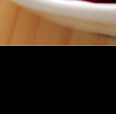

In [54]:
trimmed_image = cut_image(image_path, *box)
trimmed_image

テキストを出力にすると精度はいいかもしれないが、物体検出を合わせて行うなどより高度なタスクの場合は全く正確な返答が返って来ない。